In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Target variable: EU-ETS Carbon Market Price

In [26]:
carbon_price = pd.read_csv('eua-price.csv')

In [27]:
carbon_price.head()

,Date,Price
0,2008-04-07 00:00:00,25.3525
1,2008-04-14 00:00:00,26.1800
2,2008-04-21 00:00:00,26.3580
3,2008-04-28 00:00:00,25.5320
4,2008-05-05 00:00:00,26.4700


In [28]:
def clean_date(x):
    x = x[0:4] + '/' + x[5:7] + '/' + x[8:10]
    return x

In [29]:
carbon_price['Date'] = carbon_price['Date'].apply(clean_date)

In [30]:
carbon_price.head()

,Date,Price
0,2008/04/07,25.3525
1,2008/04/14,26.1800
2,2008/04/21,26.3580
3,2008/04/28,25.5320
4,2008/05/05,26.4700


In [38]:
carbon_price.shape

(668, 2)

We have the daily EU-ETS carbon market price, to have a better illustration, here we pick the last day of each week's data

The data is from April 7, 2008 to March 5, 2021

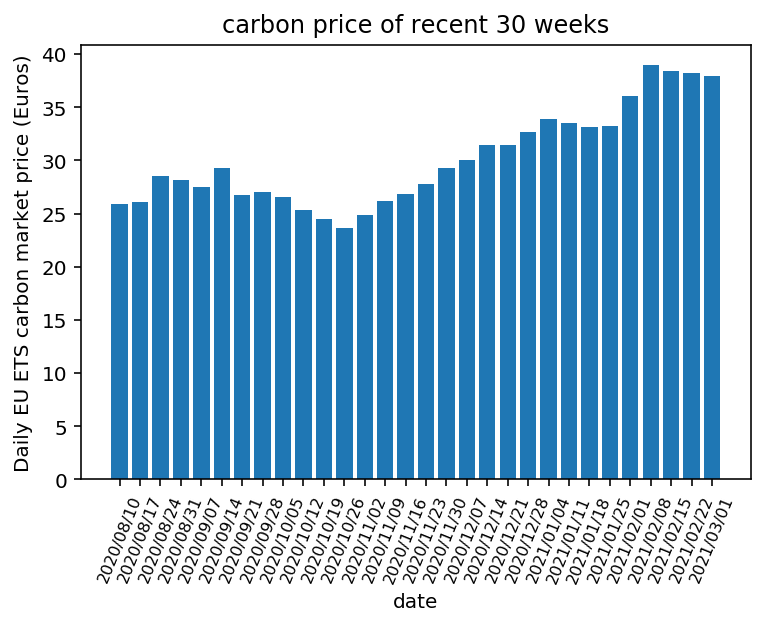

In [76]:
plt.title("carbon price of recent 30 weeks")
plt.xlabel("date")
plt.ylabel("Daily EU ETS carbon market price (Euros)")
plt.bar(carbon_price['Date'][638:],carbon_price['Price'][638:])
plt.xticks(size='small',rotation=68,fontsize=8)
plt.show()

# Independent Variable 1: CAC40 

We currently do not have access to it, since the data source needs paid membership to export the data.


# Independent Variable 2: S&P GSCI Light Energy

In [67]:
SP_LE = pd.read_csv('PerformanceGraphExport-2.csv')

In [68]:
SP_LE = SP_LE[:][6:50]

In [69]:
SP_LE.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
6,2020/12/31,409.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021/1/4,411.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021/1/5,419.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021/1/6,419.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2021/1/7,419.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
SP_LE = SP_LE.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'], axis=1)

In [74]:
SP_LE = SP_LE.rename(columns={'Unnamed: 0': 'Date', 'Unnamed: 1': 'Value'})

In [75]:
SP_LE.head()

,Date,Value
6,2020/12/31,409.77
7,2021/1/4,411.11
8,2021/1/5,419.66
9,2021/1/6,419.75
10,2021/1/7,419.86


In [77]:
SP_LE.shape

(44, 2)

Below we have the S&P GSCI Light Energy Index of recent 44 days, we can query daily values directly from the source

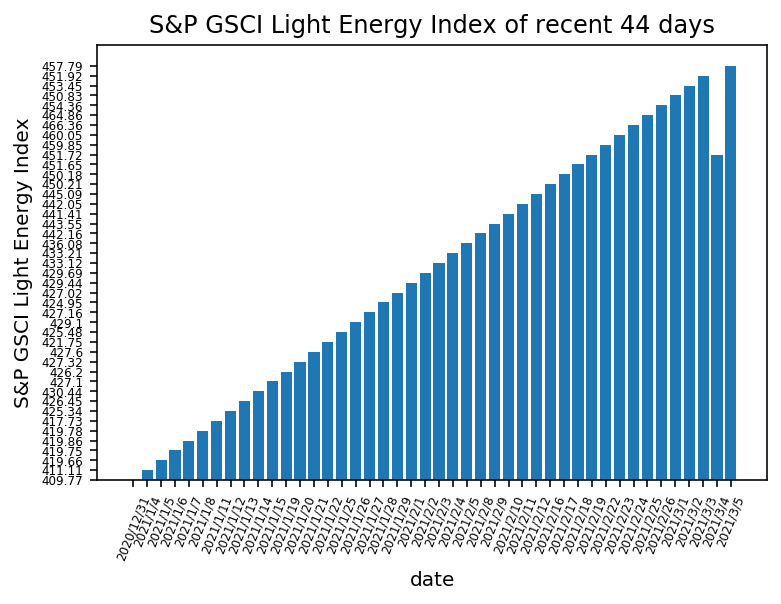

In [81]:
plt.title("S&P GSCI Light Energy Index of recent 44 days")
plt.xlabel("date")
plt.ylabel("S&P GSCI Light Energy Index")
plt.bar(SP_LE['Date'],SP_LE['Value'])
plt.xticks(size='small',rotation=68,fontsize=6)
plt.yticks(size='small',fontsize=6)
plt.show()

# Independent Variable 3: MSCI Europe Energy Index

In [82]:
MSCI = pd.read_csv("MSCI_Europe_Energy.csv")

In [83]:
MSCI.head()

,日期,收盘,开盘,高,低,交易量,涨跌幅
0,2021年3月5日,107.88,106.44,109.68,105.98,-,1.33%
1,2021年3月4日,106.46,103.72,106.63,102.60,-,2.39%
2,2021年3月3日,103.98,102.66,104.26,102.52,-,1.31%
3,2021年3月2日,102.64,101.48,103.10,100.61,-,0.06%
4,2021年3月1日,102.58,101.52,103.22,101.52,-,1.72%


In [84]:
MSCI = MSCI.drop(['开盘','高','低','交易量','涨跌幅'], axis=1)

In [85]:
MSCI.head()

,日期,收盘
0,2021年3月5日,107.88
1,2021年3月4日,106.46
2,2021年3月3日,103.98
3,2021年3月2日,102.64
4,2021年3月1日,102.58


In [86]:
MSCI = MSCI.rename(columns={'日期': 'Date', '收盘': 'Value'})

In [87]:
MSCI.head()

,Date,Value
0,2021年3月5日,107.88
1,2021年3月4日,106.46
2,2021年3月3日,103.98
3,2021年3月2日,102.64
4,2021年3月1日,102.58


In [90]:
def clean_date(x):
    x = x.replace('年','/').replace('月','/').replace('日','')
    return x

In [91]:
MSCI['Date'] = MSCI['Date'].apply(clean_date)

In [92]:
MSCI.head()

,Date,Value
0,2021/3/5,107.88
1,2021/3/4,106.46
2,2021/3/3,103.98
3,2021/3/2,102.64
4,2021/3/1,102.58


In [93]:
MSCI.shape

(47, 2)

In [99]:
MSCI = MSCI.reindex(index=MSCI.index[::-1])

In [100]:
MSCI.head()

,Date,Value
46,2020/12/31,89.99
45,2021/1/1,89.99
44,2021/1/4,88.96
43,2021/1/5,93.38
42,2021/1/6,97.62


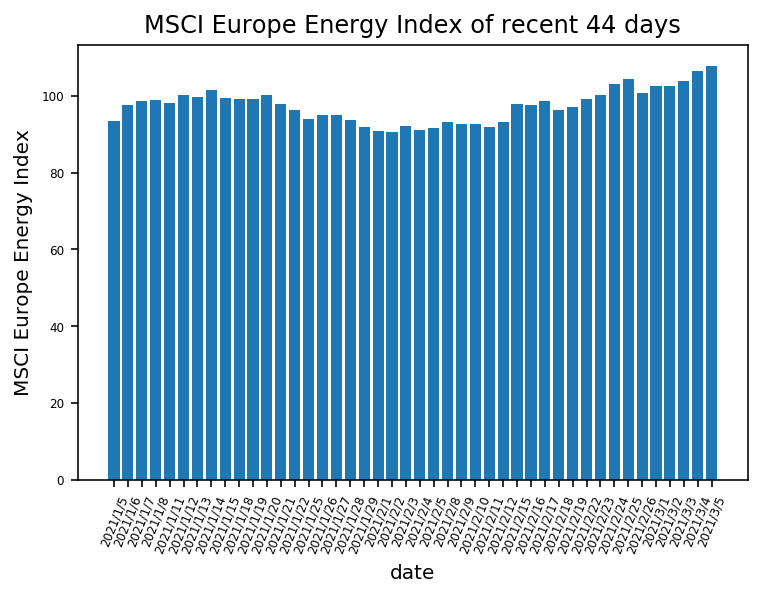

In [101]:
plt.title("MSCI Europe Energy Index of recent 44 days")
plt.xlabel("date")
plt.ylabel("MSCI Europe Energy Index")
plt.bar(MSCI['Date'][3:],MSCI['Value'][3:])
plt.xticks(size='small',rotation=68,fontsize=6)
plt.yticks(size='small',fontsize=6)
plt.show()

# Independent Variable 4: European Renewable Energy Total Return (ERIX)

In [102]:
ERIX = pd.read_csv('European_Renewable_Energy_Total_Return.csv')

In [103]:
ERIX.head()

,日期,收盘,开盘,高,低,交易量,涨跌幅
0,2021年3月5日,"2,286.53","2,381.85","2,382.64","2,282.90",-,-3.32%
1,2021年3月4日,"2,365.03","2,396.02","2,408.24","2,335.25",-,-1.13%
2,2021年3月3日,"2,392.15","2,504.75","2,520.32","2,377.85",-,-4.74%
3,2021年3月2日,"2,511.29","2,565.73","2,577.13","2,509.18",-,-2.14%
4,2021年3月1日,"2,566.14","2,534.74","2,593.59","2,523.67",-,1.70%


In [104]:
ERIX = ERIX.drop(['开盘','高','低','交易量','涨跌幅'], axis=1)
ERIX = ERIX.rename(columns={'日期': 'Date', '收盘': 'Value'})
ERIX['Date'] = ERIX['Date'].apply(clean_date)

In [105]:
ERIX.head()

,Date,Value
0,2021/3/5,"2,286.53"
1,2021/3/4,"2,365.03"
2,2021/3/3,"2,392.15"
3,2021/3/2,"2,511.29"
4,2021/3/1,"2,566.14"


In [106]:
ERIX = ERIX.reindex(index=ERIX.index[::-1])

In [107]:
ERIX.head()

,Date,Value
45,2020/12/31,"2,882.94"
44,2021/1/4,"2,975.51"
43,2021/1/5,"2,997.34"
42,2021/1/6,"3,117.94"
41,2021/1/7,"3,253.61"


In [108]:
ERIX.shape

(46, 2)

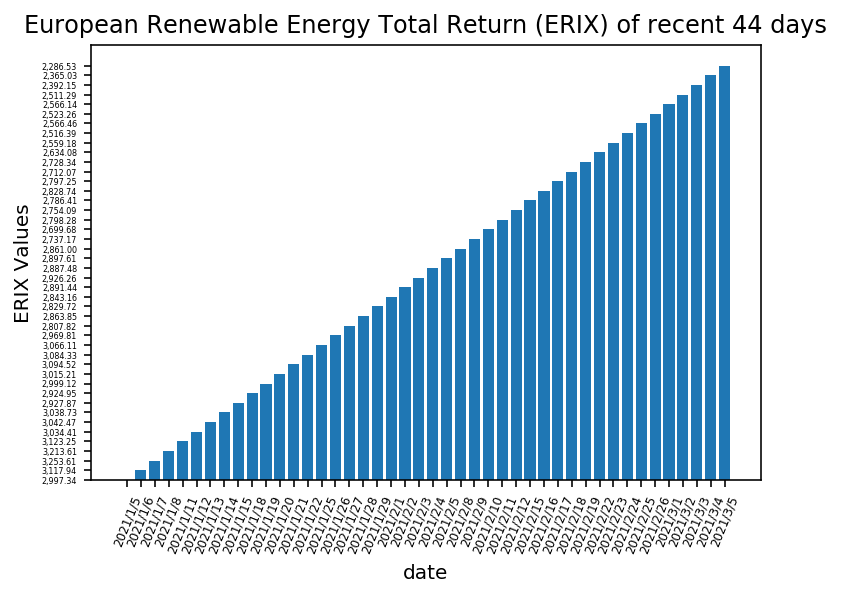

In [111]:
plt.title("European Renewable Energy Total Return (ERIX) of recent 44 days")
plt.xlabel("date")
plt.ylabel("ERIX Values")
plt.bar(ERIX['Date'][2:],ERIX['Value'][2:])
plt.xticks(size='small',rotation=68,fontsize=6)
plt.yticks(size='small',fontsize=4)
plt.show()

# Independent Variable 5: European Union Natural Gas Import Price

We currently do not have access to it, since the data source needs paid membership to export the data.

